# Superfund Sites and Demographic Patterns in NC
## Is there a disproportionate distribution of Superfund sites in minority populations in North Carolina?

This notebook will examine the distribution of Superfund Sites in North Carolina, and aims to determine if there is a correlation of minority percentage and number of Superfund Sites per county.

In [23]:
#Loading packages
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import fiona
from matplotlib.lines import Line2D

In [24]:
#Check working directory
os.getcwd()

'g:\\GIS 495\\Final Project'

In [25]:
#Reading NC County shapefile
counties = gpd.read_file('data/NC_Counties/counties.shp')

#Examining data
counties.head()

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-8853514.087 4333890.334, -8854417.1..."
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-8909472.546 4336065.305, -8906846.4..."
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-8853514.087 4333890.334, -8853463.1..."
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-9020123.382 4306915.833, -9017719.5..."
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-8910804.874 4289745.058, -8906021.2..."


In [26]:
#Reading in needed layers from Superfund Boundaries geodatabase
layers = fiona.listlayers('data/NPL_Boundaries.gdb')
print(layers)

#Extracting Superfund layer
sf_sites = gpd.read_file("data/NPL_Boundaries.gdb", layer = 'SITE_BOUNDARIES_SF')

#Examining Superfund layer
sf_sites.head()

['SITE_FEATURE_LINES_SF', 'IC_BOUNDARIES_SF', 'OU_BOUNDARIES_SF', 'SITE_BOUNDARIES_SF', 'SITE_FEATURE_POLYS_SF', 'SITE_FEATURE_POINTS_SF']


,REGION_CODE,EPA_PROGRAM,EPA_ID,SITE_NAME,SITE_FEATURE_CLASS,SITE_FEATURE_TYPE,SITE_FEATURE_NAME,SITE_FEATURE_DESCRIPTION,LAST_CHANGE_DATE,ORIGINAL_CREATION_DATE,...,CITY_NAME,COUNTY,STATE_CODE,ZIP_CODE,SITE_CONTACT_NAME,PRIMARY_TELEPHONE_NUM,SITE_CONTACT_EMAIL,Shape_Length,Shape_Area,geometry
0,1,Superfund Remedial,CTD001452093,DURHAM MEADOWS,5,Extent of Contamination,Approximate Durham Meadows Site Boundary,The Site is located in the town of Durham in M...,2024-06-30 00:00:00+00:00,2016-12-31 16:00:00+00:00,...,DURHAM,MIDDLESEX,CT,06422,Lisa Danek Burke,(617) 918-1206,DanekBurke.Lisa@epa.gov,0.029649,0.000036,"MULTIPOLYGON (((-72.68051 41.48187, -72.68008 ..."
1,1,Superfund Remedial,VTD000860239,OLD SPRINGFIELD LANDFILL,5,OU Boundary Aggregation,Approximate Old Springfield Landfill Site Boun...,The 10-acre Site is located approximately 1 mi...,2024-06-30 00:00:00+00:00,2016-12-31 16:00:00+00:00,...,SPRINGFIELD,WINDSOR,VT,05156,Ben Kuhaneck,(617) 918-1296,kuhaneck.benjamin@epa.gov,0.018776,0.000017,"MULTIPOLYGON (((-72.46109 43.27168, -72.46349 ..."
2,1,Superfund Remedial,VTD981062441,PARKER SANITARY LANDFILL,5,Comprehensive Site Area,Approximate Parker Sanitary Landfill Site Boun...,The Parker Sanitary Landfill site is located i...,2024-06-30 00:00:00+00:00,2016-12-31 16:00:00+00:00,...,LYNDON,CALEDONIA,VT,05849,Lisa Danek Burke,(617) 918-1206,danekburke.lisa@epa.gov,0.042196,0.000073,"MULTIPOLYGON (((-71.99745 44.51334, -71.99735 ..."
3,1,Superfund Remedial,VTD980523062,PINE STREET CANAL,5,Comprehensive Site Area,Approximate Pine Street Canal Site Boundary,Pine Street Canal Superfund Site (sometimes re...,2024-06-30 00:00:00+00:00,2016-12-31 16:00:00+00:00,...,BURLINGTON,CHITTENDEN,VT,05401,Lisa Danek Burke,(617) 918-1206,DanekBurke.Lisa@epa.gov,0.020389,0.000018,"MULTIPOLYGON (((-73.21883 44.46892, -73.21702 ..."
4,1,Superfund Remedial,NHD980671069,SOUTH MUNICIPAL WATER SUPPLY WELL,5,Comprehensive Site Area,Approximate South Municipal Water Supply Well ...,The Site encompasses approximately 250 acres t...,2024-06-30 00:00:00+00:00,2016-12-31 16:00:00+00:00,...,PETERBOROUGH,HILLSBOROUGH,NH,03458,Valerie Jurgens,(617) 918-1346,jurgens.valerie@epa.gov,0.027367,0.000045,"MULTIPOLYGON (((-71.96429 42.85521, -71.95974 ..."


<Axes: >

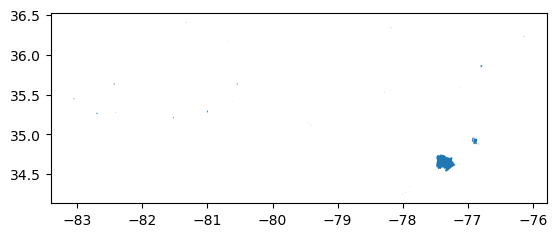

In [27]:
#Subset superfund polygons to NC
sf_nc = sf_sites[sf_sites["STATE_CODE"] == "NC"]

#Plot polygons
sf_nc.plot()

In [28]:
#Turn Superfund polygon layer to points by finding center
sf_center = sf_nc.copy()
sf_center["geometry"] = sf_nc.geometry.centroid

#Checking number of points
len(sf_center)

C:\Users\saira\AppData\Local\Temp\ipykernel_45632\2389712487.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_center["geometry"] = sf_nc.geometry.centroid


49

<Axes: >

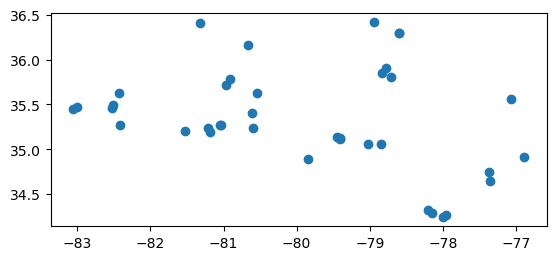

In [29]:
#Ensuring points only include final NPL Sites

#Checking NPL Status Column
sf_center.columns
sf_center["NPL_STATUS_CODE"].value_counts()

sf_points = sf_center[sf_center["NPL_STATUS_CODE"] == "F"]

#Checking number of points
len(sf_points)

#Plot points
sf_points.plot()

In [30]:
#Reading in Census data

income = pd.read_csv('data/Census_Income/ACSDT5Y2023.B19013-Data.csv')

race = pd.read_csv('data/Census_Race/ACSDT5Y2023.B02001-Data.csv')

In [31]:
#Check crs of county shapefile and Superfund layer
print(f'NC Counties CRS: {counties.crs}')
print(f'Superfund Sites CRS: {sf_points.crs}')

NC Counties CRS: EPSG:3857
Superfund Sites CRS: EPSG:4326


In [32]:
#Reproject to NAD83
counties = counties.to_crs("EPSG:4269")
sf_points = sf_points.to_crs("EPSG:4269")

In [33]:
#Double check reprojections
print(f'NC Counties CRS: {counties.crs}')
print(f'Superfund Sites CRS: {sf_points.crs}')

NC Counties CRS: EPSG:4269
Superfund Sites CRS: EPSG:4269


## Creating Superfund Sites and Median Income Map

In [34]:
#Examine income data

income.head()

,GEO_ID,NAME,B19013_001E,B19013_001M,Unnamed: 4
0,Geography,Geographic Area Name,Estimate!!Median household income in the past ...,Margin of Error!!Median household income in th...,NaN
1,0400000US37,North Carolina,69904,346,NaN
2,0500000US37001,"Alamance County, North Carolina",64445,2226,NaN
3,0500000US37003,"Alexander County, North Carolina",65268,5441,NaN
4,0500000US37005,"Alleghany County, North Carolina",44272,3954,NaN


In [35]:
#Create CO_NAME Column to match Counties dataframe

income["CO_NAME"] = [n.replace(' County, North Carolina', '').upper() for n in income["NAME"]]

income.head()


,GEO_ID,NAME,B19013_001E,B19013_001M,Unnamed: 4,CO_NAME
0,Geography,Geographic Area Name,Estimate!!Median household income in the past ...,Margin of Error!!Median household income in th...,NaN,GEOGRAPHIC AREA NAME
1,0400000US37,North Carolina,69904,346,NaN,NORTH CAROLINA
2,0500000US37001,"Alamance County, North Carolina",64445,2226,NaN,ALAMANCE
3,0500000US37003,"Alexander County, North Carolina",65268,5441,NaN,ALEXANDER
4,0500000US37005,"Alleghany County, North Carolina",44272,3954,NaN,ALLEGHANY


In [36]:
#Tidying income dataframe

#Remove unnecessary rows
income = income.drop([0, 1]) 

#Renaming columns
income = income.rename(columns={"B19013_001E": "Median_Income_Estimate", "B19013_001M": "Median_Income_MOE"})

#Examine dataframe
income.head()

,GEO_ID,NAME,Median_Income_Estimate,Median_Income_MOE,Unnamed: 4,CO_NAME
2,0500000US37001,"Alamance County, North Carolina",64445,2226,NaN,ALAMANCE
3,0500000US37003,"Alexander County, North Carolina",65268,5441,NaN,ALEXANDER
4,0500000US37005,"Alleghany County, North Carolina",44272,3954,NaN,ALLEGHANY
5,0500000US37007,"Anson County, North Carolina",44245,3895,NaN,ANSON
6,0500000US37009,"Ashe County, North Carolina",50827,3707,NaN,ASHE


In [37]:
#Merging dataframes
income_counties = counties.merge(income, how='inner', on='CO_NAME')

income_counties.head()

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,GEO_ID,NAME,Median_Income_Estimate,Median_Income_MOE,Unnamed: 4
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-79.53247 36.24141, -79.54059 36.241...",0500000US37157,"Rockingham County, North Carolina",55796,1938,NaN
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-80.03516 36.25717, -80.01156 36.256...",0500000US37081,"Guilford County, North Carolina",66027,1584,NaN
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-79.53247 36.24141, -79.53201 36.250...",0500000US37001,"Alamance County, North Carolina",64445,2226,NaN
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-81.02915 36.04573, -81.00755 36.000...",0500000US37003,"Alexander County, North Carolina",65268,5441,NaN
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-80.04712 35.92092, -80.00415 35.918...",0500000US37151,"Randolph County, North Carolina",59047,2415,NaN


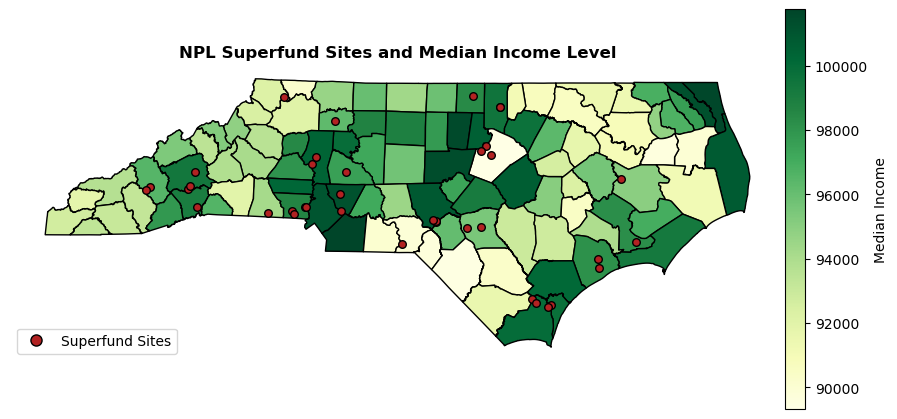

In [38]:
#Creating plot
fig, ax = plt.subplots(figsize = (10, 8)) 
income_counties.plot(column = "Median_Income_Estimate", ax = ax, 
cmap = "YlGn", legend = False, edgecolor = "black") 
sf_points.plot(ax=ax, color="firebrick", markersize=30, marker="o", edgecolor = "black") 

ax.set_title( "NPL Superfund Sites and Median Income Level", fontsize=12, fontweight='bold') 
ax.set_axis_off() 

cax = fig.add_axes([0.9, 0.25, 0.02, 0.5]) 
sm = plt.cm.ScalarMappable(cmap="YlGn", norm=plt.Normalize(
    vmin=income_counties["Median_Income_Estimate"].min(), 
    vmax=income_counties["Median_Income_Estimate"].max()) ) 
cbar = fig.colorbar(sm, cax=cax) 
cbar.set_label('Median Income')

ax.legend(
    [Line2D([0], [0], marker='o', color='w', markerfacecolor='firebrick',
            markeredgecolor='black', markersize=8, linestyle='None')],
    ["Superfund Sites"], loc = "lower left"
)

## Creating Superfund Sites and Minority Percentage Map

In [39]:
#Examining race data

race.head()

,GEO_ID,NAME,B02001_001E,B02001_001M,B02001_002E,B02001_002M,B02001_003E,B02001_003M,B02001_004E,B02001_004M,...,B02001_006M,B02001_007E,B02001_007M,B02001_008E,B02001_008M,B02001_009E,B02001_009M,B02001_010E,B02001_010M,Unnamed: 22
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!White alone,Margin of Error!!Total:!!White alone,Estimate!!Total:!!Black or African American alone,Margin of Error!!Total:!!Black or African Amer...,Estimate!!Total:!!American Indian and Alaska N...,Margin of Error!!Total:!!American Indian and A...,...,Margin of Error!!Total:!!Native Hawaiian and O...,Estimate!!Total:!!Some Other Race alone,Margin of Error!!Total:!!Some Other Race alone,Estimate!!Total:!!Two or More Races:,Margin of Error!!Total:!!Two or More Races:,Estimate!!Total:!!Two or More Races:!!Two race...,Margin of Error!!Total:!!Two or More Races:!!T...,Estimate!!Total:!!Two or More Races:!!Two race...,Margin of Error!!Total:!!Two or More Races:!!T...,NaN
1,0400000US37,North Carolina,10584340,*****,6695587,8580,2178329,7224,110873,2406,...,667,506289,8574,753265,12054,381924,7864,371341,7287,NaN
2,0500000US37001,"Alamance County, North Carolina",174286,*****,109467,1087,34710,873,831,358,...,35,14649,1395,11673,1099,5336,806,6337,953,NaN
3,0500000US37003,"Alexander County, North Carolina",36440,*****,31804,313,1468,364,331,357,...,29,809,275,1636,390,289,154,1347,384,NaN
4,0500000US37005,"Alleghany County, North Carolina",11075,*****,10115,223,164,95,21,23,...,21,25,36,665,249,410,224,255,109,NaN


In [40]:
#Create CO_NAME Column to match Counties dataframe

race["CO_NAME"] = [n.replace(' County, North Carolina', '').upper() for n in race["NAME"]]

race.head()

,GEO_ID,NAME,B02001_001E,B02001_001M,B02001_002E,B02001_002M,B02001_003E,B02001_003M,B02001_004E,B02001_004M,...,B02001_007E,B02001_007M,B02001_008E,B02001_008M,B02001_009E,B02001_009M,B02001_010E,B02001_010M,Unnamed: 22,CO_NAME
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!White alone,Margin of Error!!Total:!!White alone,Estimate!!Total:!!Black or African American alone,Margin of Error!!Total:!!Black or African Amer...,Estimate!!Total:!!American Indian and Alaska N...,Margin of Error!!Total:!!American Indian and A...,...,Estimate!!Total:!!Some Other Race alone,Margin of Error!!Total:!!Some Other Race alone,Estimate!!Total:!!Two or More Races:,Margin of Error!!Total:!!Two or More Races:,Estimate!!Total:!!Two or More Races:!!Two race...,Margin of Error!!Total:!!Two or More Races:!!T...,Estimate!!Total:!!Two or More Races:!!Two race...,Margin of Error!!Total:!!Two or More Races:!!T...,NaN,GEOGRAPHIC AREA NAME
1,0400000US37,North Carolina,10584340,*****,6695587,8580,2178329,7224,110873,2406,...,506289,8574,753265,12054,381924,7864,371341,7287,NaN,NORTH CAROLINA
2,0500000US37001,"Alamance County, North Carolina",174286,*****,109467,1087,34710,873,831,358,...,14649,1395,11673,1099,5336,806,6337,953,NaN,ALAMANCE
3,0500000US37003,"Alexander County, North Carolina",36440,*****,31804,313,1468,364,331,357,...,809,275,1636,390,289,154,1347,384,NaN,ALEXANDER
4,0500000US37005,"Alleghany County, North Carolina",11075,*****,10115,223,164,95,21,23,...,25,36,665,249,410,224,255,109,NaN,ALLEGHANY


In [41]:
#Selecting relevant columns

minor = race[["GEO_ID", "CO_NAME", "B02001_001E", "B02001_002E"]]

#Checking dataframe
minor.head()

,GEO_ID,CO_NAME,B02001_001E,B02001_002E
0,Geography,GEOGRAPHIC AREA NAME,Estimate!!Total:,Estimate!!Total:!!White alone
1,0400000US37,NORTH CAROLINA,10584340,6695587
2,0500000US37001,ALAMANCE,174286,109467
3,0500000US37003,ALEXANDER,36440,31804
4,0500000US37005,ALLEGHANY,11075,10115


In [42]:
#Renaming columns
minor = minor.rename(columns={"B02001_001E": "Total_Estimate", "B02001_002E": "Total_White_Alone"})

In [43]:
#Removing first two rows
minor = minor.drop([0, 1]) 

#Check dataframe
minor.head()

,GEO_ID,CO_NAME,Total_Estimate,Total_White_Alone
2,0500000US37001,ALAMANCE,174286,109467
3,0500000US37003,ALEXANDER,36440,31804
4,0500000US37005,ALLEGHANY,11075,10115
5,0500000US37007,ANSON,21903,9924
6,0500000US37009,ASHE,26831,25215


In [44]:
#Creating Minorities Columns

#Check data type of columns
print(minor["Total_Estimate"].dtype)
print(minor["Total_White_Alone"].dtype)

#Convert to numeric
minor["Total_Estimate"] = pd.to_numeric(minor["Total_Estimate"])
minor["Total_White_Alone"] = pd.to_numeric(minor["Total_White_Alone"])

#Calculating new columns
minor["Total_Minorities"] = minor["Total_Estimate"] - minor["Total_White_Alone"]
minor["Percentage_Minorities"] = minor["Total_Minorities"] / minor["Total_Estimate"] * 100

#Checking dataframe
minor.head()

object
object


,GEO_ID,CO_NAME,Total_Estimate,Total_White_Alone,Total_Minorities,Percentage_Minorities
2,0500000US37001,ALAMANCE,174286,109467,64819,37.191169
3,0500000US37003,ALEXANDER,36440,31804,4636,12.722283
4,0500000US37005,ALLEGHANY,11075,10115,960,8.668172
5,0500000US37007,ANSON,21903,9924,11979,54.691138
6,0500000US37009,ASHE,26831,25215,1616,6.022884


In [45]:
#Merging dataframes
min_counties = counties.merge(minor, how='inner', on='CO_NAME')

min_counties.head()

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,GEO_ID,Total_Estimate,Total_White_Alone,Total_Minorities,Percentage_Minorities
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-79.53247 36.24141, -79.54059 36.241...",0500000US37157,91585,66525,25060,27.362559
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-80.03516 36.25717, -80.01156 36.256...",0500000US37081,542987,266751,276236,50.873409
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-79.53247 36.24141, -79.53201 36.250...",0500000US37001,174286,109467,64819,37.191169
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-81.02915 36.04573, -81.00755 36.000...",0500000US37003,36440,31804,4636,12.722283
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-80.04712 35.92092, -80.00415 35.918...",0500000US37151,145322,116545,28777,19.802232


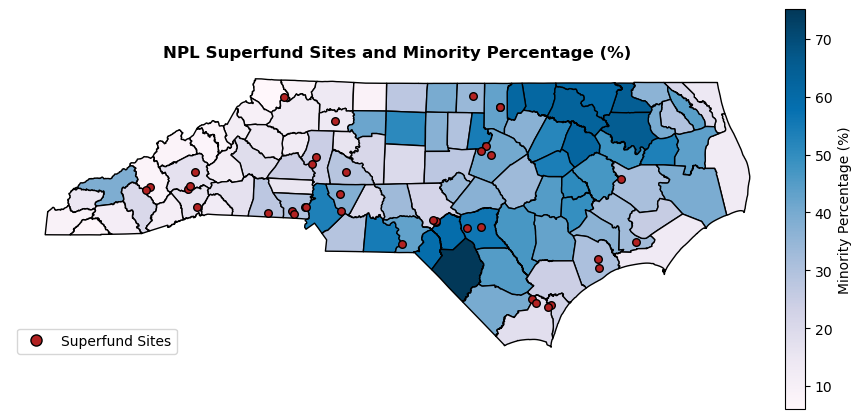

In [46]:
#Creating plot
fig, ax = plt.subplots(figsize = (10, 8)) 
min_counties.plot(column = "Percentage_Minorities", ax = ax, 
cmap = "PuBu", legend = False, edgecolor = "black") 
sf_points.plot(ax=ax, color="firebrick", markersize=30, marker="o", edgecolor = "black") 

ax.set_title( "NPL Superfund Sites and Minority Percentage (%)", fontsize=12, fontweight='bold') 
ax.set_axis_off() 

cax = fig.add_axes([0.9, 0.25, 0.02, 0.5]) 
sm = plt.cm.ScalarMappable(cmap="PuBu", norm=plt.Normalize(
    vmin=min_counties["Percentage_Minorities"].min(), 
    vmax=min_counties["Percentage_Minorities"].max()) ) 
cbar = fig.colorbar(sm, cax=cax) 
cbar.set_label('Minority Percentage (%)')

ax.legend(
    [Line2D([0], [0], marker='o', color='w', markerfacecolor='firebrick',
            markeredgecolor='black', markersize=8, linestyle='None')],
    ["Superfund Sites"], loc = "lower left"
)

## Creating a Correlation Plot between Number of Superfund Sites and Minority Percentage per County

In [47]:
#Counting Superfund Sites per County

#Renaming County Column to CO_NAME
sf_points = sf_points.rename(columns={"COUNTY": "CO_NAME"})
sf_points.head()

#Creating new count data frame
sf_count = sf_points.groupby("CO_NAME").size().reset_index(name="sf_count")
sf_count.head()

,CO_NAME,sf_count
0,ASHE,1
1,BEAUFORT,1
2,BRUNSWICK,2
3,BUNCOMBE,3
4,CABARRUS,1


In [48]:
#Merging count dataframe with minority percentage dataframe
min_counties = min_counties.merge(sf_count, on="CO_NAME", how="left")

#Replacing NaNs with 0s
min_counties["sf_count"] = min_counties["sf_count"].fillna(0)

#Examining dataframe
min_counties.tail()

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,GEO_ID,Total_Estimate,Total_White_Alone,Total_Minorities,Percentage_Minorities,sf_count
95,96,96.0,172698.187500,ROWAN,ROWA,335082.468750,566593.969329,MRO,212737.946739,1.459618e+10,"POLYGON ((-80.45922 35.74411, -80.45886 35.743...",0500000US37159,148487,105910,42577,28.673891,1.0
96,97,97.0,138930.328125,LINCOLN,LINC,196551.218750,455807.279973,MRO,170626.329750,8.561766e+09,"POLYGON ((-81.53749 35.5643, -81.5374 35.56467...",0500000US37109,90359,76579,13780,15.250279,0.0
97,98,98.0,192864.546875,MECKLENBURG,MECK,351606.437500,632756.423077,MRO,236507.398318,1.521717e+10,"POLYGON ((-80.94717 35.48859, -80.90684 35.514...",0500000US37119,1130906,526435,604471,53.450154,1.0
98,99,99.0,133645.343750,CABARRUS,CABA,233367.062500,438468.114614,MRO,164101.209806,1.016546e+10,"POLYGON ((-80.78407 35.50729, -80.73699 35.507...",0500000US37025,231262,143046,88216,38.145480,1.0
99,100,100.0,151477.359375,GASTON,GAST,232694.484375,496971.956611,MRO,185718.367227,1.013617e+10,"POLYGON ((-81.45555 35.41977, -81.25372 35.413...",0500000US37071,231485,163004,68481,29.583342,4.0


In [49]:
#Preparing objects for correlation
count = min_counties["sf_count"]
min_perc = min_counties["Percentage_Minorities"]

In [50]:
#Calculating correlation
p_corr = np.corrcoef(count, min_perc)[0, 1]

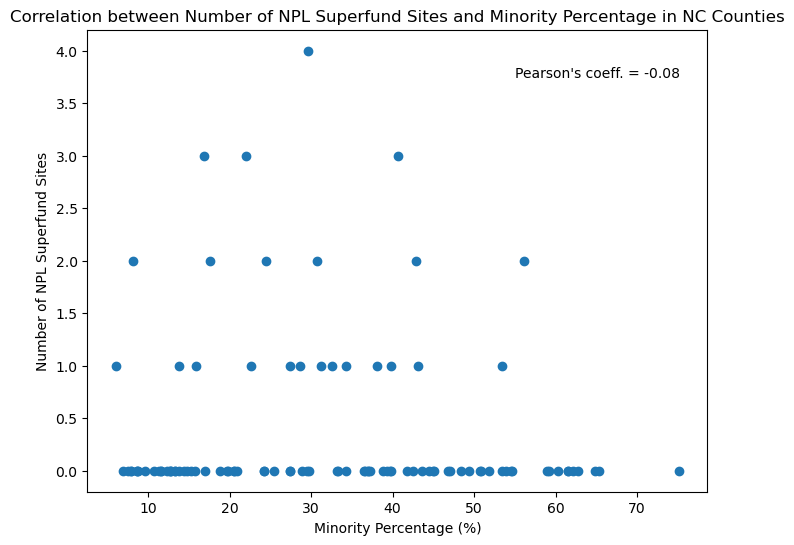

In [51]:
#Plotting correlation
plt.figure(figsize=(8,6))
plt.scatter(min_perc, count)
plt.text(55, 3.75, s=f"Pearson's coeff. = {np.round(p_corr, 2)}")
plt.ylabel('Number of NPL Superfund Sites')
plt.xlabel('Minority Percentage (%)')
plt.title(f'Correlation between Number of NPL Superfund Sites and Minority Percentage in NC Counties')
plt.show()


## Creating Correlation Plot that Excludes Counties with no Superfund Sites

In [52]:
#Creating new objects that exclude counties with 0 Superfund Sites
count_no_zero = min_counties["sf_count"][min_counties["sf_count"] > 0]
min_perc_no_zero = min_counties["Percentage_Minorities"][min_counties["sf_count"] > 0]


In [53]:
#Calculating correlation
p_corr_no_zero = np.corrcoef(count_no_zero, min_perc_no_zero)[0,1]

print(p_corr_no_zero)

-0.05130039262356139


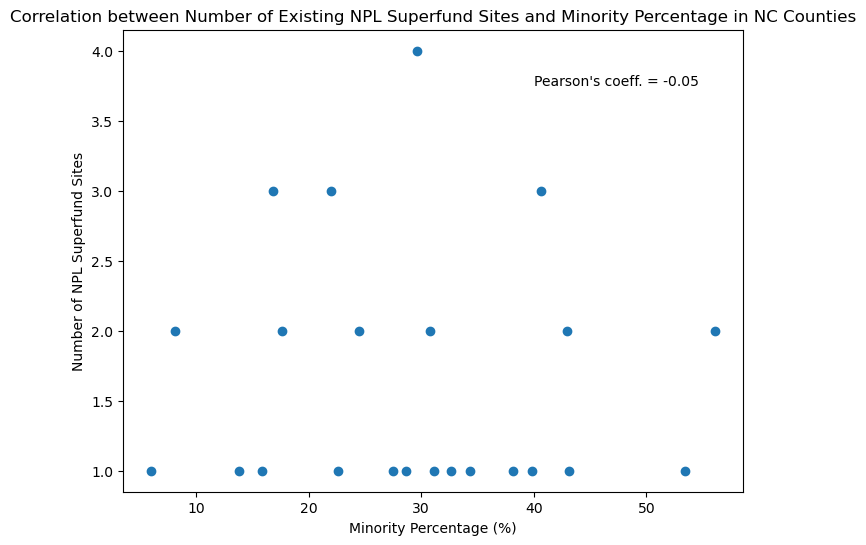

In [54]:
#Plotting
plt.figure(figsize=(8,6))
plt.scatter(min_perc_no_zero, count_no_zero)
plt.text(40, 3.75, s=f"Pearson's coeff. = {np.round(p_corr_no_zero, 2)}")
plt.ylabel('Number of NPL Superfund Sites')
plt.xlabel('Minority Percentage (%)')
plt.title(f'Correlation between Number of Existing NPL Superfund Sites and Minority Percentage in NC Counties')
plt.show()


## Plotting Top 10 Counties with Highest Count of NPL Superfund Sites 

In [55]:
#Sorting dataframe by highest NPL Superfund Site count
top10 = min_counties.sort_values("sf_count", ascending=False).head(10)

top10.head()

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,GEO_ID,Total_Estimate,Total_White_Alone,Total_Minorities,Percentage_Minorities,sf_count
99,100,100.0,151477.359375,GASTON,GAST,232694.484375,496971.956611,MRO,185718.367227,1.013617e+10,"POLYGON ((-81.45555 35.41977, -81.25372 35.413...",0500000US37071,231485,163004,68481,29.583342,4.0
50,51,51.0,238712.781250,BUNCOMBE,BUNC,422189.187500,783176.809942,ARO,293846.865625,1.839055e+10,"POLYGON ((-82.40863 35.81808, -82.40832 35.818...",0500000US37021,271790,225935,45855,16.871482,3.0
42,43,43.0,216781.765625,WAKE,WAKE,547995.375000,711224.841117,RRO,267577.156743,2.387066e+10,"POLYGON ((-78.54668 36.02156, -78.51228 36.009...",0500000US37183,1151009,683568,467441,40.611411,3.0
66,67,67.0,225127.625000,MOORE,MOOR,451347.312500,738606.285338,FRO,276136.044372,1.966068e+10,"POLYGON ((-79.55606 35.51493, -79.49338 35.515...",0500000US37125,102840,80209,22631,22.006029,3.0
51,52,52.0,202233.390625,HAYWOOD,HAYW,354865.093750,663494.060185,ARO,248910.535799,1.545791e+10,"POLYGON ((-82.96189 35.79091, -82.96139 35.790...",0500000US37087,62432,57353,5079,8.135251,2.0


([<matplotlib.axis.YTick at 0x175f5069810>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4')])

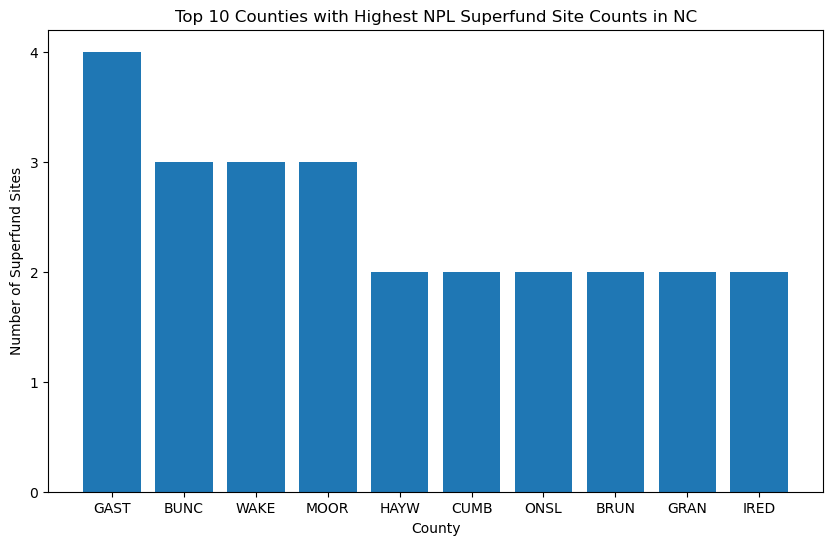

In [56]:
#Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(top10["CO_ABBR"], top10["sf_count"])
plt.title("Top 10 Counties with Highest NPL Superfund Site Counts in NC")
plt.xlabel("County")
plt.ylabel("Number of Superfund Sites")
plt.yticks(np.arange(0, 5, 1))

##  Mapping County with Highest Count of Superfund Sites

In [57]:
#Checking row for Gaston County
min_counties[min_counties["CO_NAME"] == "GASTON"]

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,GEO_ID,Total_Estimate,Total_White_Alone,Total_Minorities,Percentage_Minorities,sf_count
99,100,100.0,151477.359375,GASTON,GAST,232694.484375,496971.956611,MRO,185718.367227,1.013617e+10,"POLYGON ((-81.45555 35.41977, -81.25372 35.413...",0500000US37071,231485,163004,68481,29.583342,4.0


<Axes: >

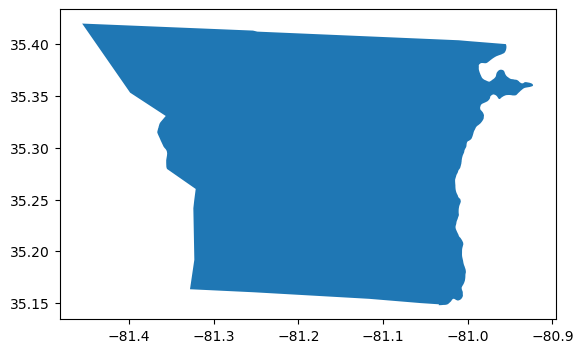

In [58]:
#Subsetting NC Counties shapefile for Gaston County
gaston_co = counties[counties["CO_NAME"]== "GASTON"]

gaston_co.plot()

In [59]:
#Subsetting Superfund Point Layer to Gaston County
sf_gaston = sf_points[sf_points["CO_NAME"]== "GASTON"]

In [60]:
#Reading Social Vulnerability Index Layer
svi_layers = fiona.listlayers('data/SVI.gdb')
print(svi_layers)

#Extracting SVI layer from geodatabase
svi = gpd.read_file("data/SVI.gdb", layer = 'SVI2022_NORTHCAROLINA_tract')

#Examine dataframe
svi.head()

['SVI2022_NORTHCAROLINA_tract']


,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE,Shape_Length,Shape_Area,geometry
0,37,North Carolina,NC,37001,Alamance County,37001020100,Census Tract 201; Alamance County; North Carolina,1.741972,4477,502,...,0.9,0.0,0.9,1.1,1.1,0.0,0.9,0.102692,0.000455,"MULTIPOLYGON (((-79.45802 36.09945, -79.45333 ..."
1,37,North Carolina,NC,37001,Alamance County,37001020200,Census Tract 202; Alamance County; North Carolina,1.337730,4213,790,...,1.0,0.0,1.0,0.5,0.7,2.3,2.9,0.084414,0.000346,"MULTIPOLYGON (((-79.43321 36.09916, -79.4293 3..."
2,37,North Carolina,NC,37001,Alamance County,37001020301,Census Tract 203.01; Alamance County; North Ca...,1.916549,4004,626,...,1.1,0.0,1.1,0.5,0.7,0.0,1.1,0.092926,0.000501,"MULTIPOLYGON (((-79.41992 36.10751, -79.41783 ..."
3,37,North Carolina,NC,37001,Alamance County,37001020302,Census Tract 203.02; Alamance County; North Ca...,2.439727,3432,692,...,1.2,0.0,1.2,5.1,5.4,0.0,1.2,0.113944,0.000648,"MULTIPOLYGON (((-79.40876 36.0835, -79.40629 3..."
4,37,North Carolina,NC,37001,Alamance County,37001020400,Census Tract 204; Alamance County; North Carolina,4.462626,6682,775,...,0.6,0.0,0.6,5.7,3.9,0.3,0.6,0.181512,0.001183,"MULTIPOLYGON (((-79.46613 36.13243, -79.46592 ..."


In [61]:
#Subsetting SVI Data for Gaston County
svi_gaston = svi[svi["COUNTY"]== "Gaston County"]

In [62]:
#Check CRS of SVI Layer
svi_gaston.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [63]:
#Selecting needed columns
min_gaston = svi_gaston[["COUNTY", "FIPS", "LOCATION", 	"AREA_SQMI", "E_TOTPOP", "EP_MINRTY", "geometry"]]

min_gaston.head()

,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,EP_MINRTY,geometry
837,Gaston County,37071030103,Census Tract 301.03; Gaston County; North Caro...,7.770659,1284,5.0,"MULTIPOLYGON (((-81.05461 35.40525, -81.03067 ..."
838,Gaston County,37071030104,Census Tract 301.04; Gaston County; North Caro...,7.205512,2479,27.2,"MULTIPOLYGON (((-81.01138 35.4036, -80.99827 3..."
839,Gaston County,37071030105,Census Tract 301.05; Gaston County; North Caro...,1.953341,3016,28.5,"MULTIPOLYGON (((-81.02541 35.31883, -81.02248 ..."
840,Gaston County,37071030106,Census Tract 301.06; Gaston County; North Caro...,3.272141,1124,17.0,"MULTIPOLYGON (((-81.01458 35.30273, -81.01424 ..."
841,Gaston County,37071030205,Census Tract 302.05; Gaston County; North Caro...,7.715898,4028,15.5,"MULTIPOLYGON (((-81.16238 35.40903, -81.12966 ..."


In [64]:
#Ensuring all layers are in the same CRS
print(f'Gaston County CRS: {gaston_co.crs}')
print(f'Superfund Sites CRS: {sf_gaston.crs}')
print(f'Minority Percentage Data CRS: {svi_gaston.crs}')

Gaston County CRS: EPSG:4269
Superfund Sites CRS: EPSG:4269
Minority Percentage Data CRS: EPSG:4269


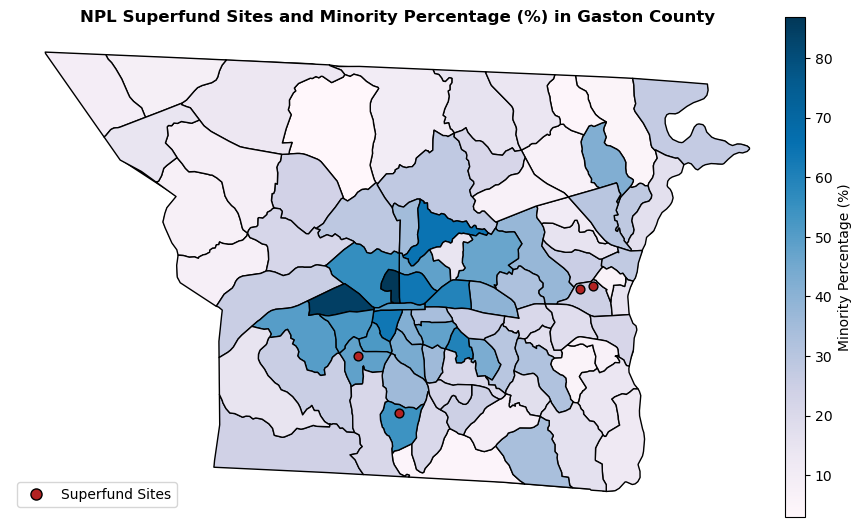

In [65]:
#Creating Plot
fig, ax = plt.subplots(figsize=(10, 10))
gaston_co.plot(ax=ax, color='black', linewidth=1)
svi_gaston.plot(column = "EP_MINRTY", ax = ax, 
cmap = "PuBu", legend = False, edgecolor = "black") 
sf_gaston.plot(ax=ax, color="firebrick", markersize=40, marker="o", edgecolor = "black") 

ax.set_title( "NPL Superfund Sites and Minority Percentage (%) in Gaston County", fontsize=12, fontweight='bold') 
ax.set_axis_off() 

cax = fig.add_axes([0.9, 0.25, 0.02, 0.5]) 
sm = plt.cm.ScalarMappable(cmap="PuBu", norm=plt.Normalize(
    vmin=svi_gaston["EP_MINRTY"].min(), 
    vmax=svi_gaston["EP_MINRTY"].max()) ) 
cbar = fig.colorbar(sm, cax=cax) 
cbar.set_label('Minority Percentage (%)')

ax.legend(
    [Line2D([0], [0], marker='o', color='w', markerfacecolor='firebrick',
            markeredgecolor='black', markersize=8, linestyle='None')],
    ["Superfund Sites"], loc = "lower left"
)

## 